In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import requests
#"https://www1.nyc.gov/assets/nypd/downloads/excel/crime_statistics/park-crime/nyc-park-crime-stats-q1-2020a.xlsx"

In [2]:
errors = list()
for i in range(1,5):
    for j in range (2015,2021):
        try:
            globals()['crime_q{}_{}'.format(i,j)]= pd.read_excel(f"https://www1.nyc.gov/assets/nypd/downloads/excel/crime_statistics/park-crime/nyc-park-crime-stats-q{i}-{j}.xlsx")
        except:
            errors.append((i,j))
print(errors) 

crime_q1_2020 = pd.read_excel("https://www1.nyc.gov/assets/nypd/downloads/excel/crime_statistics/park-crime/nyc-park-crime-stats-q1-2020a.xlsx")
crime_q4_2019=crime_q4_2019.drop('Unnamed: 12',axis=1)

[(1, 2020)]


In [3]:
crime_q4_2019

,4th QTR PARK CRIME REPORT,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,SEVEN MAJOR COMPLAINTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Report covering the period Between Oct 1, 201...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PARK,BOROUGH,SIZE (ACRES),CATEGORY,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL
3,PELHAM BAY PARK,BRONX,2771.747,ONE ACRE OR LARGER,0,0,0,0,0,0,0,0
4,VAN CORTLANDT PARK,BRONX,1146.43,ONE ACRE OR LARGER,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1153,MOHEGAN TRIANGLE,BRONX,0.096,PLAYGROUND LESS THAN ONE ACRE,0,0,0,0,0,0,0,0
1154,PLAYGROUND OF THE AMERICAS,MANHATTAN,0.079,PLAYGROUND LESS THAN ONE ACRE,0,0,0,0,0,0,0,0
1155,PRIVATE WILLIAM GRAY PARK,QUEENS,0.069,PLAYGROUND LESS THAN ONE ACRE,0,0,0,0,0,0,0,0
1156,ADRIENNE'S PLAYGROUND,MANHATTAN,0,PLAYGROUND LESS THAN ONE ACRE,0,0,0,0,0,0,0,0


In [4]:
def counter(df):
    count = 0
    for row in df.iloc[:,0]:
        if row != "PARK":
            count +=1
        else:
            break
    return count

def change_type(df):
    df.iloc[0:,4:]=df.iloc[:,4:].astype(float)
    df.iloc[0:,2:3]=df.iloc[:,2:3].astype(float)
    return df 

def capital(df):
    index = list()
    for i in df.columns:
        index.append(str(i).upper())
    df.columns = index
    return df

def clear (df):
    data = df.drop(index = np.arange(counter(df)),axis=0)
    data.columns = data.iloc[0,:]
    data = data.drop(index=counter(df), axis=0)
    return change_type(capital(data))

def change_category(df):
    for i, size in enumerate(df['SIZE (ACRES)']):
        if size >= 1.0:
            df.loc[i,'CATEGORY']='ONE ACRE OR LARGER'
        else:
            df.loc[i,'CATEGORY']='LESS THAN ONE ACRE'
    return df           

In [5]:
errors = []
for i in range(1,5):
    for j in range (2015,2021):
        try:
            globals()['crime_q{}_{}'.format(i,j)]= clear(globals()['crime_q{}_{}'.format(i,j)]) 
        except KeyError as Error:
            errors.append(Error)
print(errors)            

[]


In [6]:
def sumowanie(year):
    data = pd.DataFrame()
    lista = [globals()['crime_q{}_{}'.format(i,year)]for i in range(1,5)]
    data = pd.concat(lista)
       
    return data 

In [7]:
for j in range (2015,2021):
    globals()['crime_{}'.format(j)]= sumowanie(j).groupby(["PARK", 'BOROUGH', 'SIZE (ACRES)', 'CATEGORY'], as_index=False).sum().sort_values(by = 'SIZE (ACRES)', ascending = False) 

In [8]:
sumowanie(2019)


,PARK,BOROUGH,SIZE (ACRES),CATEGORY,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL
3,PELHAM BAY PARK,BRONX,2771.747,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,VAN CORTLANDT PARK,BRONX,1146.43,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ROCKAWAY BEACH AND BOARDWALK,QUEENS,1072.564,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,FRESHKILLS PARK,STATEN ISLAND,913.32,ONE ACRE OR LARGER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,FLUSHING MEADOWS CORONA PARK,QUEENS,897.69,ONE ACRE OR LARGER,0.0,1.0,1.0,1.0,1.0,4.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1153,MOHEGAN TRIANGLE,BRONX,0.096,PLAYGROUND LESS THAN ONE ACRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1154,PLAYGROUND OF THE AMERICAS,MANHATTAN,0.079,PLAYGROUND LESS THAN ONE ACRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1155,PRIVATE WILLIAM GRAY PARK,QUEENS,0.069,PLAYGROUND LESS THAN ONE ACRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1156,ADRIENNE'S PLAYGROUND,MANHATTAN,0.0,PLAYGROUND LESS THAN ONE ACRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#!pip install geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [10]:
def do_geocode(address, attempt=1, max_attempts=10):
    try:
        return geolocator.geocode(address, timeout=None)
    except GeocoderTimedOut:
        if attempt <= max_attempts:
            return do_geocode(address, attempt=attempt+1)
        raise

In [11]:
LATITUDE=[]
LONGITUDE=[]
geolocator = Nominatim(user_agent="ny_explorer")

errors =[]
for i in crime_2018['PARK']:
    try:
        address = str(i)+", NY"
        location = do_geocode(address)
        LATITUDE.append(location.latitude)
        LONGITUDE.append(location.longitude)
    except AttributeError as Error:
        LATITUDE.append(np.nan)
        LONGITUDE.append(np.nan)
        errors.append(i)

In [12]:
lat=pd.DataFrame(LATITUDE).rename(columns={0:"LATITUDE"})
lon=pd.DataFrame(LONGITUDE).rename(columns={0:"LONGITUDE"})
for j in range(2015,2021):
    globals()["crime_{}".format(j)]=globals()["crime_{}".format(j)].join([lat,lon]).dropna().reset_index(drop=True)



In [13]:
#!conda install -c conda-forge folium --yes
import folium # map rendering library

In [14]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [15]:
#location of all parks and playgrounds
map_NY = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(crime_2020['LATITUDE'], crime_2020['LONGITUDE'], crime_2020['PARK']):
    label_1 = folium.Popup(str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label_1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NY)  
    
map_NY

In [16]:
#location of Parks and playground where commit crime
crime2020=crime_2020.loc[crime_2020["TOTAL"]>0]

crime_NY = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label,total in zip(crime2020['LATITUDE'], crime2020['LONGITUDE'], crime2020['PARK'],crime2020['TOTAL']):
    label_1 = folium.Popup(str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2*math.log(float(total)),
        popup=label_1,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.0,
        parse_html=False).add_to(crime_NY)  
    
crime_NY

In [17]:
#Crimes by Category of park/playground
size_2020 = change_category(crime_2020).groupby(['CATEGORY'],as_index=False).sum().drop(["SIZE (ACRES)","LATITUDE","LONGITUDE"], axis=1)
size_2020

,CATEGORY,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL
0,LESS THAN ONE ACRE,3.0,2.0,11.0,17.0,1.0,9.0,0.0,43.0
1,ONE ACRE OR LARGER,10.0,21.0,214.0,201.0,43.0,199.0,8.0,696.0


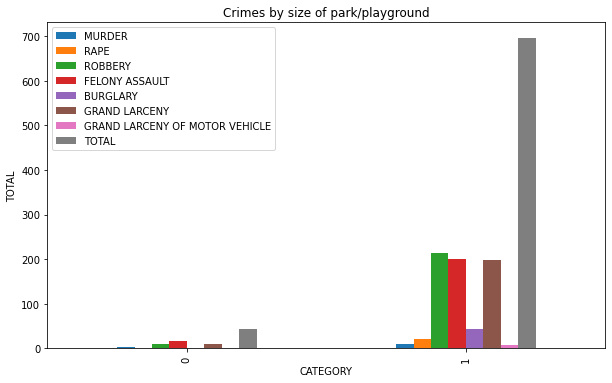

In [18]:
size_2020.plot(kind='bar', figsize=(10, 6))

plt.xlabel('CATEGORY') # add to x-label to the plot
plt.ylabel('TOTAL') # add y-label to the plot
plt.title('Crimes by size of park/playground') # add title to the plot

plt.show()

In [19]:
for i in range(2015,2021):
    globals()["size_{}".format(i)]=change_category(globals()["crime_{}".format(i)]).groupby('CATEGORY', as_index=False).sum().drop(["SIZE (ACRES)","LATITUDE","LONGITUDE"], axis=1)

In [20]:
group = pd.DataFrame()
for i in range(2015,2021):
    group[str(i)]=globals()["size_{}".format(i)].sum(axis=0).drop('CATEGORY')
group = group.transpose()
group.index.name="YEAR"
group=group.reset_index()
group

,YEAR,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL
0,2015,7.0,14.0,264.0,158.0,19.0,314.0,5.0,781.0
1,2016,9.0,20.0,335.0,168.0,22.0,476.0,4.0,1034.0
2,2017,2.0,23.0,372.0,201.0,19.0,490.0,6.0,1113.0
3,2018,8.0,24.0,296.0,199.0,22.0,484.0,7.0,1040.0
4,2019,5.0,16.0,315.0,225.0,32.0,463.0,5.0,1061.0
5,2020,13.0,23.0,225.0,218.0,44.0,208.0,8.0,739.0


<AxesSubplot:ylabel='YEAR'>

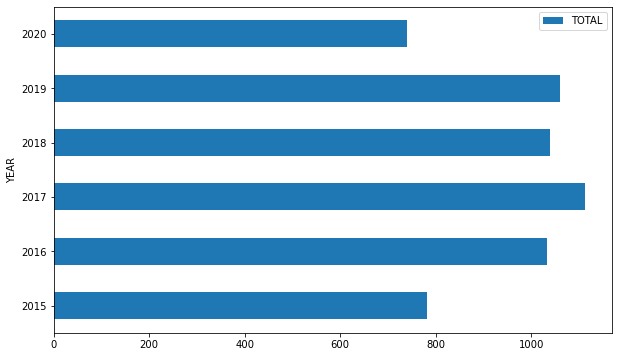

In [21]:
group.plot(kind="barh", x="YEAR", y=["TOTAL"],figsize=(10, 6))

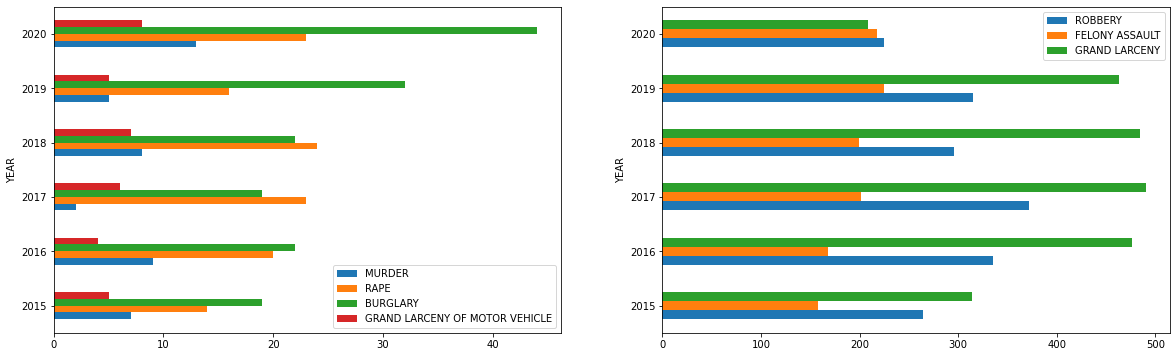

In [22]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=False)

#ax.invert_xaxis()
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")

group.plot(kind="barh", x="YEAR", y=["MURDER","RAPE","BURGLARY","GRAND LARCENY OF MOTOR VEHICLE"],ax=ax, figsize=(20,6))
group.plot(kind="barh", x="YEAR", y=["ROBBERY","FELONY ASSAULT","GRAND LARCENY"],ax=ax2, figsize=(20,6))

plt.show()

# Clustering data

In [24]:
#lets sums all data from all years to one dataframe

lista = [globals()["crime_{}".format(j)] for j in range(2015,2021)]
df = pd.concat(lista).groupby(['PARK', 'BOROUGH', 'SIZE (ACRES)', 'CATEGORY','LATITUDE',"LONGITUDE"],as_index=False).sum().sort_values(by = 'SIZE (ACRES)', ascending = False)

#df =sum.join(crime_2020['LATITUDE']).join(crime_2020["LONGITUDE"])
df.head()

,PARK,BOROUGH,SIZE (ACRES),CATEGORY,LATITUDE,LONGITUDE,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL
633,PELHAM BAY PARK,BRONX,2771.747,ONE ACRE OR LARGER,40.679857,-73.775151,0.0,2.0,11.0,8.0,0.0,16.0,1.0,38.0
890,VAN CORTLANDT PARK,BRONX,1146.430,ONE ACRE OR LARGER,40.828341,-73.857534,0.0,2.0,13.0,15.0,5.0,19.0,0.0,54.0
723,ROCKAWAY BEACH AND BOARDWALK,QUEENS,1072.564,ONE ACRE OR LARGER,40.710000,-73.917778,0.0,2.0,10.0,14.0,5.0,52.0,0.0,83.0
310,FRESHKILLS PARK,STATEN ISLAND,913.320,ONE ACRE OR LARGER,40.693441,-73.791175,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
288,FLUSHING MEADOWS CORONA PARK,QUEENS,897.690,ONE ACRE OR LARGER,40.902222,-73.905278,0.0,4.0,51.0,47.0,25.0,175.0,15.0,317.0


In [25]:
from sklearn.cluster import KMeans

In [26]:
clusters=4

kmeans = KMeans(n_clusters=clusters, random_state=4).fit(df[["MURDER", "RAPE", "ROBBERY", "FELONY ASSAULT", "BURGLARY", "GRAND LARCENY", "GRAND LARCENY OF MOTOR VEHICLE"]])

#kmeans.labels_[0:10]
df.insert(0, 'Cluster Labels', kmeans.labels_)


In [27]:
df.head()

,Cluster Labels,PARK,BOROUGH,SIZE (ACRES),CATEGORY,LATITUDE,LONGITUDE,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL
633,2,PELHAM BAY PARK,BRONX,2771.747,ONE ACRE OR LARGER,40.679857,-73.775151,0.0,2.0,11.0,8.0,0.0,16.0,1.0,38.0
890,2,VAN CORTLANDT PARK,BRONX,1146.430,ONE ACRE OR LARGER,40.828341,-73.857534,0.0,2.0,13.0,15.0,5.0,19.0,0.0,54.0
723,2,ROCKAWAY BEACH AND BOARDWALK,QUEENS,1072.564,ONE ACRE OR LARGER,40.710000,-73.917778,0.0,2.0,10.0,14.0,5.0,52.0,0.0,83.0
310,0,FRESHKILLS PARK,STATEN ISLAND,913.320,ONE ACRE OR LARGER,40.693441,-73.791175,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
288,3,FLUSHING MEADOWS CORONA PARK,QUEENS,897.690,ONE ACRE OR LARGER,40.902222,-73.905278,0.0,4.0,51.0,47.0,25.0,175.0,15.0,317.0


In [28]:
df0= df.loc[df["Cluster Labels"]==0]
df1= df.loc[df["Cluster Labels"]==1]  #df1 indicate no crime
df2= df.loc[df["Cluster Labels"]==2]
df3= df.loc[df["Cluster Labels"]==3]

In [43]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# add markers to map
for lat, lng, label,total in zip(df2['LATITUDE'], df2['LONGITUDE'], df2['PARK'],df2['TOTAL']):
    label_1 = folium.Popup(str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label_1,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.0,
        parse_html=False).add_to(map_clusters)
    
# add markers to map
for lat, lng, label,total in zip(df3['LATITUDE'], df3['LONGITUDE'], df3['PARK'], df3['TOTAL']):
    label_1 = folium.Popup(str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label_1,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.0,
        parse_html=False).add_to(map_clusters)
    
# add markers to map
for lat, lng, label,total in zip(df1['LATITUDE'], df1['LONGITUDE'], df1['PARK'], df1['TOTAL']):
    label_1 = folium.Popup(str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label_1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.0,
        parse_html=False).add_to(map_clusters)    
       
map_clusters

In [40]:
df[["PARK","Cluster Labels"]].groupby("Cluster Labels", as_index=False).count().sort_values(by="PARK").rename(index={0:"Almost none crime commited",1:"Medium (blue)",2:"Low (green)", 3: 'High (red)'})

,Cluster Labels,PARK
High (red),3,3
Medium (blue),1,6
Low (green),2,31
Almost none crime commited,0,903


# Venues near parks that should be avoided

In [63]:
CLIENT_ID = 'RDW40NUGF2BAQZXNCITZCHTEINHRNLUBQE4OD0SQFDX30LBW' # your Foursquare ID
CLIENT_SECRET = 'FOICTK2CP3QWUNP2PRQ25KY5CVMT1HQ2Z242LHAXIXE320FW' # your Foursquare Secret
ACCESS_TOKEN = 'D2PZF0JTRLCPRULEA1VEZ25FWNGZQAIN3UWCMAT0CNUGW5YP' # your FourSquare Access Token
VERSION = '20210117' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Foursquare data credentials loaded corectly')

Foursquare data credentials loaded corectly


In [64]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [65]:
venues_high_risk = getNearbyVenues(df3['PARK'],df3['LATITUDE'], df3['LONGITUDE'], radius=150)

FLUSHING MEADOWS CORONA PARK


KeyError: 'groups'

In [68]:
radius = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
results = requests.get(url).json()

In [69]:
results

{'meta': {'code': 410,
  'errorType': 'deprecated',
  'errorDetail': 'Usage of the V2 Places API has been deprecated for new Projects. Please see our updated documentation for V3 for more details: https://docs.foursquare.com/reference',
  'requestId': '61e53dbbf742940e612e6466'},
 'response': {}}